In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.layers import *
from keras.models import Model
from keras.layers.advanced_activations import LeakyReLU
from keras.backend import expand_dims
from PIL import Image
import pickle as pk

from tools import *
from model import *
from os.path import getsize
from sys import getsizeof
%matplotlib inline

Using TensorFlow backend.


KeyboardInterrupt: 

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [38]:
x_train[0].size

784

In [40]:
np.save("img_ori.npy", x_train[0])

In [41]:
getsize("img_ori.npy")
# bytes

912

In [42]:
[encoder, decoder, autoencoder] = pk.load(open('model' + str(1) + '.pkl', 'rb'))

/Users/jojo/opt/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [54]:
x_train[0][0].nbytes

28

In [50]:
encoder.predict([[x_test[0]]])[0].nbytes

4

In [47]:
np.save("img_encode.npy", encoder.predict([[x_test[0]]])[0])

In [48]:
getsize("img_encode.npy")

132

In [120]:
import pickle as pk
for i in range(30):
    try:
        [encoder, decoder, autoencoder] = pk.load(open('model' + str(i+1) + '.pkl', 'rb'))
    except:
        encoder, decoder, autoencoder = create_model('CNN', encoding_dim=i+1)
        pass
    autoencoder.fit(x_train, x_train,
                    epochs=50,
                    batch_size=1024,
                    shuffle=True,
                    validation_data=(x_test, x_test),
                    verbose=0)
    pk.dump([encoder, decoder, autoencoder], open('model' + str(i+1) + '.pkl', 'wb'))

C:\Users\tangji\Anaconda3\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
C:\Users\tangji\Anaconda3\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
C:\Users\tangji\Anaconda3\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
C:\Users\tangji\Anaconda3\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
C:\Users\tan

In [6]:
import pickle as pk
pk.dump([encoder, decoder, autoencoder], open('model' + str(i+1) + '.pkl', 'wb'))

W1217 22:08:32.686443 10764 deprecation_wrapper.py:119] From C:\Users\tangji\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1217 22:08:32.749519 10764 deprecation_wrapper.py:119] From C:\Users\tangji\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1217 22:08:32.901425 10764 deprecation_wrapper.py:119] From C:\Users\tangji\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1217 22:08:32.902425 10764 deprecation_wrapper.py:119] From C:\Users\tangji\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W1217 22:08:32.903431 10764 deprecation_wrapper.py:119] From C:

In [4]:
file_size = []
mse_loss = []
for i in range(1, 96):
    y_test = []
    y_size = []
    for img in x_test:
        result = Image.fromarray(img)
        name = 'imgs/temp.jpg'
        result.save(name, 'JPEG', quality=i)
        y_size.append(getsize(name)/912)
        I = np.asarray(Image.open(name))
        y_test.append(I)
    mse_loss.append(np.mean(np.linalg.norm(np.array(y_test)-x_test, axis=(1,2), ord=2)))
    file_size.append(np.mean(y_size))

KeyboardInterrupt: 

In [17]:
28*28

784

Text(0, 0.5, 'MSE')

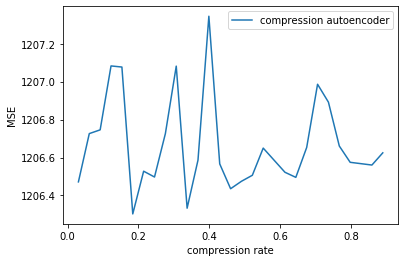

In [15]:
# plt.plot(file_size, mse_loss)
plt.plot(file_size_auto, mse_loss_auto)
plt.legend(['compression autoencoder'])
plt.xlabel("compression rate")
plt.ylabel("MSE")

Text(0, 0.5, 'MSE')

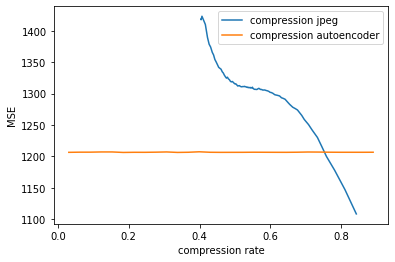

In [14]:
plt.plot(file_size, mse_loss)
plt.plot(file_size_auto, mse_loss_auto)
plt.legend(['compression jpeg', 'compression autoencoder'])
plt.xlabel("compression rate")
plt.ylabel("MSE")

# plt.plot(getsize('out_encode.npy')/912, np.linalg.norm(a[0]-x_train[0], ord=2), 'or')

In [72]:
pk.dump([file_size, mse_loss], open('log_jpg', 'wb'))

In [5]:
[file_size, mse_loss] = pk.load(open('log_jpg', 'rb'))
[file_size_auto, mse_loss_auto] = pk.load(open('log_auto', 'rb'))

In [13]:
file_size_auto = np.array(file_size_auto)[np.array(mse_loss_auto) < 1300]
mse_loss_auto = np.array(mse_loss_auto)[np.array(mse_loss_auto) < 1300]

In [8]:
file_size_auto

[0.03070175438596491,
 0.06140350877192982,
 0.09210526315789473,
 0.12280701754385964,
 0.15350877192982457,
 0.18421052631578946,
 0.2149122807017544,
 0.24561403508771928,
 0.27631578947368424,
 0.30701754385964913,
 0.33771929824561403,
 0.3684210526315789,
 0.3991228070175439,
 0.4298245614035088,
 0.4605263157894737,
 0.49122807017543857,
 0.5219298245614035,
 0.5526315789473685,
 0.5833333333333334,
 0.6140350877192983,
 0.6447368421052632,
 0.6754385964912281,
 0.706140350877193,
 0.7368421052631579,
 0.7675438596491229,
 0.7982456140350878,
 0.8289473684210527,
 0.8596491228070176,
 0.8903508771929824]

In [116]:
file_size_auto = np.array(file_size_auto)/912

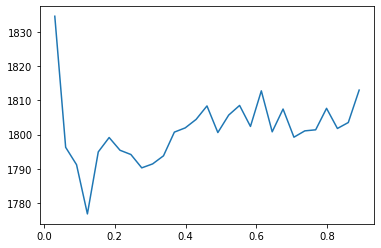

In [117]:
plt.plot(file_size_auto, mse_loss_auto)

In [ ]:
mse_loss_auto = np.array(mse_loss_auto)

In [17]:
mse_loss_auto

[1206.4716, 1206.7261, 1206.7458]

In [13]:
file_size_auto = []
mse_loss_auto = []
for i in range(1, 30):
    [encoder, decoder, autoencoder] = pk.load(open('model' + str(i+1) + '.pkl', 'rb'))
    y_test = autoencoder.predict(x_test)
    file_size_auto.append(28 * i / 912)
    mse_loss_auto.append(np.mean(np.linalg.norm(np.array(y_test)-x_test, axis=(1,2), ord=2)))

/Users/jojo/opt/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


/Users/jojo/opt/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
/Users/jojo/opt/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
/Users/jojo/opt/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


KeyboardInterrupt: 